In [1]:

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.metrics import r2_score

### Read the data

In [77]:
data = pd.read_csv("rainfall in india 1901-2015.csv")
data.head(10)

,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.200000,87.100000,29.200000,2.300000,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.000001,159.800000,12.200000,0.000001,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.700000,144.000000,0.000001,1.000000,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.400000,14.700000,0.000001,202.400000,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.300000,0.000001,3.300000,26.900000,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
5,ANDAMAN & NICOBAR ISLANDS,1906,36.600000,0.000001,0.000001,0.000001,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9
6,ANDAMAN & NICOBAR ISLANDS,1907,110.700000,0.000001,113.300000,21.600000,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.7,751.2,1327.1,1158.9
7,ANDAMAN & NICOBAR ISLANDS,1908,20.900000,85.100000,0.000001,29.000000,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,106.0,591.0,2303.7,575.7
8,ANDAMAN & NICOBAR ISLANDS,1910,26.600000,22.700000,206.300000,89.300000,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.5,2899.4,49.3,520.1,1701.0,629.0
9,ANDAMAN & NICOBAR ISLANDS,1911,0.000001,8.400000,0.000001,122.500000,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,2687.2,8.4,449.8,1553.6,675.4


## Data Preparation

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4116 entries, 0 to 4115
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SUBDIVISION  4116 non-null   object 
 1   YEAR         4116 non-null   int64  
 2   JAN          4116 non-null   float64
 3   FEB          4116 non-null   float64
 4   MAR          4116 non-null   float64
 5   APR          4116 non-null   float64
 6   MAY          4116 non-null   float64
 7   JUN          4116 non-null   float64
 8   JUL          4116 non-null   float64
 9   AUG          4116 non-null   float64
 10  SEP          4116 non-null   float64
 11  OCT          4116 non-null   float64
 12  NOV          4116 non-null   float64
 13  DEC          4116 non-null   float64
 14  ANNUAL       4116 non-null   float64
 15  Jan-Feb      4116 non-null   float64
 16  Mar-May      4116 non-null   float64
 17  Jun-Sep      4116 non-null   float64
 18  Oct-Dec      4116 non-null   float64
dtypes: flo

In [79]:
data.isnull().sum()

SUBDIVISION    0
YEAR           0
JAN            0
FEB            0
MAR            0
APR            0
MAY            0
JUN            0
JUL            0
AUG            0
SEP            0
OCT            0
NOV            0
DEC            0
ANNUAL         0
Jan-Feb        0
Mar-May        0
Jun-Sep        0
Oct-Dec        0
dtype: int64

In [80]:
data.duplicated().sum()

0

In [83]:


# Load the CSV file

# Get unique entries in the 'SUBDIVISION' column
unique_subdivisions = data['SUBDIVISION'].unique()

print(unique_subdivisions)
print(len(unique_subdivisions))

['ANDAMAN & NICOBAR ISLANDS' 'ARUNACHAL PRADESH' 'ASSAM & MEGHALAYA'
 'NAGA MANI MIZO TRIPURA' 'SUB HIMALAYAN WEST BENGAL & SIKKIM'
 'GANGETIC WEST BENGAL' 'ORISSA' 'JHARKHAND' 'BIHAR' 'EAST UTTAR PRADESH'
 'WEST UTTAR PRADESH' 'UTTARAKHAND' 'HARYANA DELHI & CHANDIGARH' 'PUNJAB'
 'HIMACHAL PRADESH' 'JAMMU & KASHMIR' 'WEST RAJASTHAN' 'EAST RAJASTHAN'
 'WEST MADHYA PRADESH' 'EAST MADHYA PRADESH' 'GUJARAT REGION'
 'SAURASHTRA & KUTCH' 'KONKAN & GOA' 'MADHYA MAHARASHTRA' 'MATATHWADA'
 'VIDARBHA' 'CHHATTISGARH' 'COASTAL ANDHRA PRADESH' 'TELANGANA'
 'RAYALSEEMA' 'TAMIL NADU' 'COASTAL KARNATAKA' 'NORTH INTERIOR KARNATAKA'
 'SOUTH INTERIOR KARNATAKA' 'KERALA' 'LAKSHADWEEP']
36


In [81]:
data['SUBDIVISION'].value_counts()


SUBDIVISION
WEST MADHYA PRADESH                   115
EAST RAJASTHAN                        115
COASTAL KARNATAKA                     115
TAMIL NADU                            115
RAYALSEEMA                            115
TELANGANA                             115
COASTAL ANDHRA PRADESH                115
CHHATTISGARH                          115
VIDARBHA                              115
MATATHWADA                            115
MADHYA MAHARASHTRA                    115
KONKAN & GOA                          115
SAURASHTRA & KUTCH                    115
GUJARAT REGION                        115
EAST MADHYA PRADESH                   115
KERALA                                115
WEST RAJASTHAN                        115
SOUTH INTERIOR KARNATAKA              115
JAMMU & KASHMIR                       115
HIMACHAL PRADESH                      115
PUNJAB                                115
HARYANA DELHI & CHANDIGARH            115
UTTARAKHAND                           115
WEST UTTAR PRADESH    

In [7]:
data.mean(numeric_only=True) 


YEAR       1958.218659
JAN          18.938897
FEB          21.789432
MAR          27.319315
APR          43.085520
MAY          85.682920
JUN         229.954762
JUL         346.623834
AUG         289.981414
SEP         197.074223
OCT          95.344582
NOV          39.759621
DEC          18.824733
ANNUAL     1402.095821
Jan-Feb      40.688387
Mar-May     155.560860
Jun-Sep    1062.137974
Oct-Dec     153.613776
dtype: float64

In [8]:
data = data.fillna(data.mean(numeric_only=True)) 


In [9]:
data.head(10)


,SUBDIVISION,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
0,ANDAMAN & NICOBAR ISLANDS,1901,49.200000,87.100000,29.200000,2.300000,528.8,517.5,365.1,481.1,332.6,388.5,558.2,33.6,3373.2,136.3,560.3,1696.3,980.3
1,ANDAMAN & NICOBAR ISLANDS,1902,0.000001,159.800000,12.200000,0.000001,446.1,537.1,228.9,753.7,666.2,197.2,359.0,160.5,3520.7,159.8,458.3,2185.9,716.7
2,ANDAMAN & NICOBAR ISLANDS,1903,12.700000,144.000000,0.000001,1.000000,235.1,479.9,728.4,326.7,339.0,181.2,284.4,225.0,2957.4,156.7,236.1,1874.0,690.6
3,ANDAMAN & NICOBAR ISLANDS,1904,9.400000,14.700000,0.000001,202.400000,304.5,495.1,502.0,160.1,820.4,222.2,308.7,40.1,3079.6,24.1,506.9,1977.6,571.0
4,ANDAMAN & NICOBAR ISLANDS,1905,1.300000,0.000001,3.300000,26.900000,279.5,628.7,368.7,330.5,297.0,260.7,25.4,344.7,2566.7,1.3,309.7,1624.9,630.8
5,ANDAMAN & NICOBAR ISLANDS,1906,36.600000,0.000001,0.000001,0.000001,556.1,733.3,247.7,320.5,164.3,267.8,128.9,79.2,2534.4,36.6,556.1,1465.8,475.9
6,ANDAMAN & NICOBAR ISLANDS,1907,110.700000,0.000001,113.300000,21.600000,616.3,305.2,443.9,377.6,200.4,264.4,648.9,245.6,3347.9,110.7,751.2,1327.1,1158.9
7,ANDAMAN & NICOBAR ISLANDS,1908,20.900000,85.100000,0.000001,29.000000,562.0,693.6,481.4,699.9,428.8,170.7,208.1,196.9,3576.4,106.0,591.0,2303.7,575.7
8,ANDAMAN & NICOBAR ISLANDS,1910,26.600000,22.700000,206.300000,89.300000,224.5,472.7,264.3,337.4,626.6,208.2,267.3,153.5,2899.4,49.3,520.1,1701.0,629.0
9,ANDAMAN & NICOBAR ISLANDS,1911,0.000001,8.400000,0.000001,122.500000,327.3,649.0,253.0,187.1,464.5,333.8,94.5,247.1,2687.2,8.4,449.8,1553.6,675.4


In [10]:
data.isnull().any()


SUBDIVISION    False
YEAR           False
JAN            False
FEB            False
MAR            False
APR            False
MAY            False
JUN            False
JUL            False
AUG            False
SEP            False
OCT            False
NOV            False
DEC            False
ANNUAL         False
Jan-Feb        False
Mar-May        False
Jun-Sep        False
Oct-Dec        False
dtype: bool

In [11]:
data.YEAR.unique()


array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1910, 1911, 1912,
       1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923,
       1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934,
       1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1946, 1947, 1949,
       1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960,
       1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971,
       1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982,
       1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993,
       1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004,
       2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015,
       1943, 1944, 1945, 1948, 1909], dtype=int64)

In [12]:
data.describe()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,Jan-Feb,Mar-May,Jun-Sep,Oct-Dec
count,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000,4116.000000
mean,1958.218659,18.938897,21.789432,27.319315,43.085520,85.682920,229.954762,346.623834,289.981414,197.074223,95.344582,39.759621,18.824733,1402.095821,40.688387,155.560860,1062.137974,153.613776
std,33.140898,33.574241,35.901220,46.936787,67.811511,123.211711,234.705204,269.690148,188.895403,135.518992,99.512313,68.624424,42.328296,907.896986,59.285415,201.228532,708.822281,166.902936
min,1901.000000,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001,0.000001
25%,1930.000000,0.600000,0.600000,1.000000,3.000000,8.600000,70.000000,174.800000,155.650000,100.400000,14.500000,0.600000,0.100000,795.075000,4.100000,23.800000,571.825000,33.500000
50%,1958.000000,6.000000,6.700000,7.800000,15.600000,36.400000,138.650000,284.400000,259.250000,173.700000,64.900000,9.500000,3.000000,1118.650000,19.100000,74.450000,880.250000,97.400000
75%,1987.000000,22.125000,26.800000,31.225000,49.825000,96.825000,304.950000,418.225000,377.725000,265.725000,148.300000,45.825000,17.500000,1635.100000,50.300000,196.900000,1287.550000,212.600000
max,2015.000000,583.700000,403.500000,605.600000,595.100000,1168.600000,1609.900000,2362.800000,1664.600000,1222.000000,948.300000,648.900000,617.500000,6331.100000,699.500000,1745.800000,4536.900000,1252.500000


In [13]:
data.shape


(4116, 19)

## Data Visualization

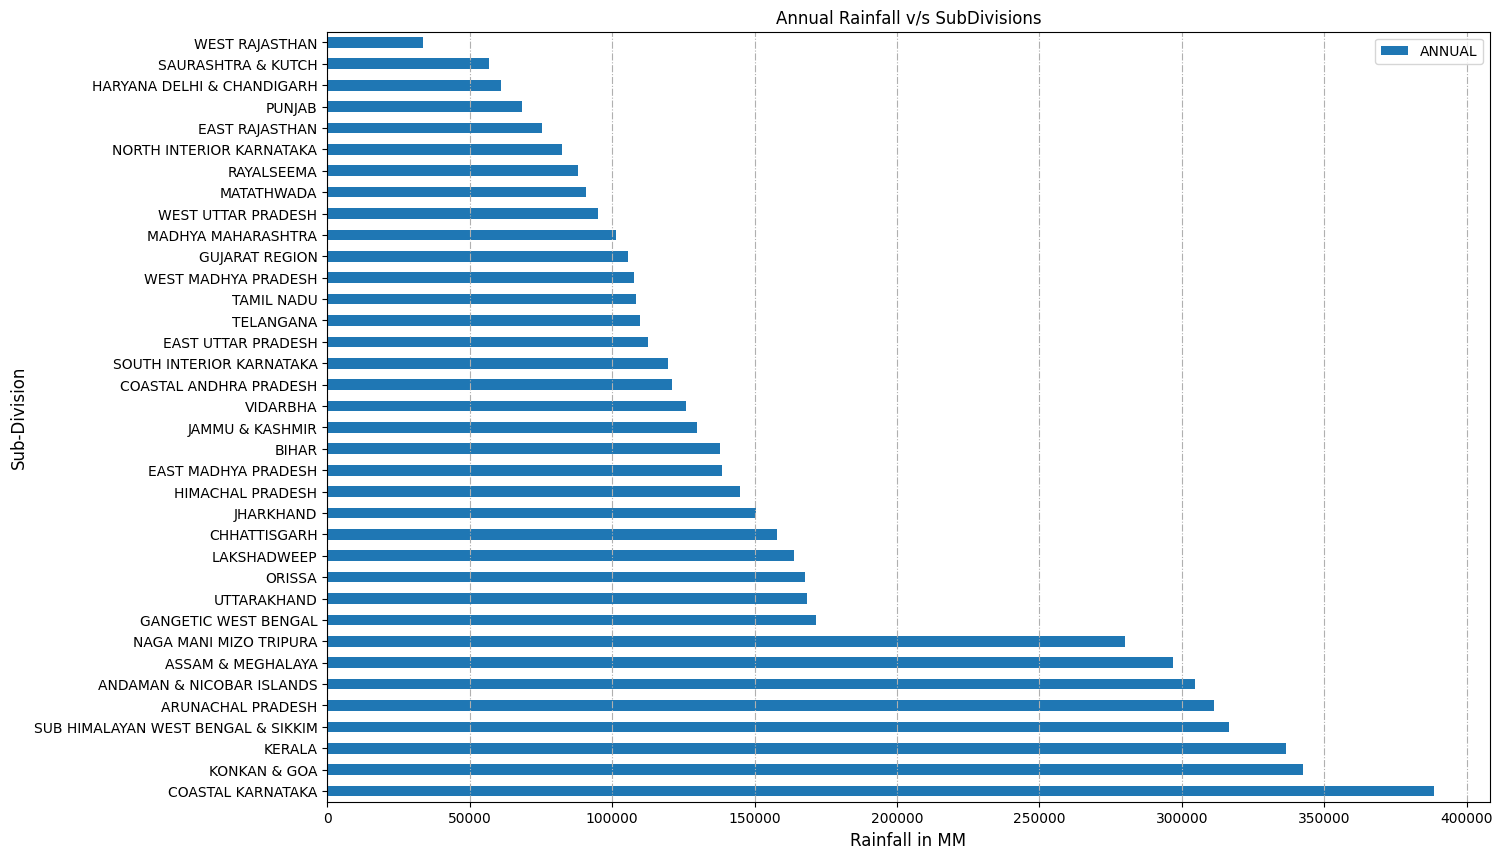

In [14]:
data[["SUBDIVISION","ANNUAL"]].groupby("SUBDIVISION").sum().sort_values(by='ANNUAL',ascending=False).plot(kind='barh',stacked=True,figsize=(15,10))
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.title("Annual Rainfall v/s SubDivisions")
plt.grid(axis="x",linestyle="-.")
plt.show()


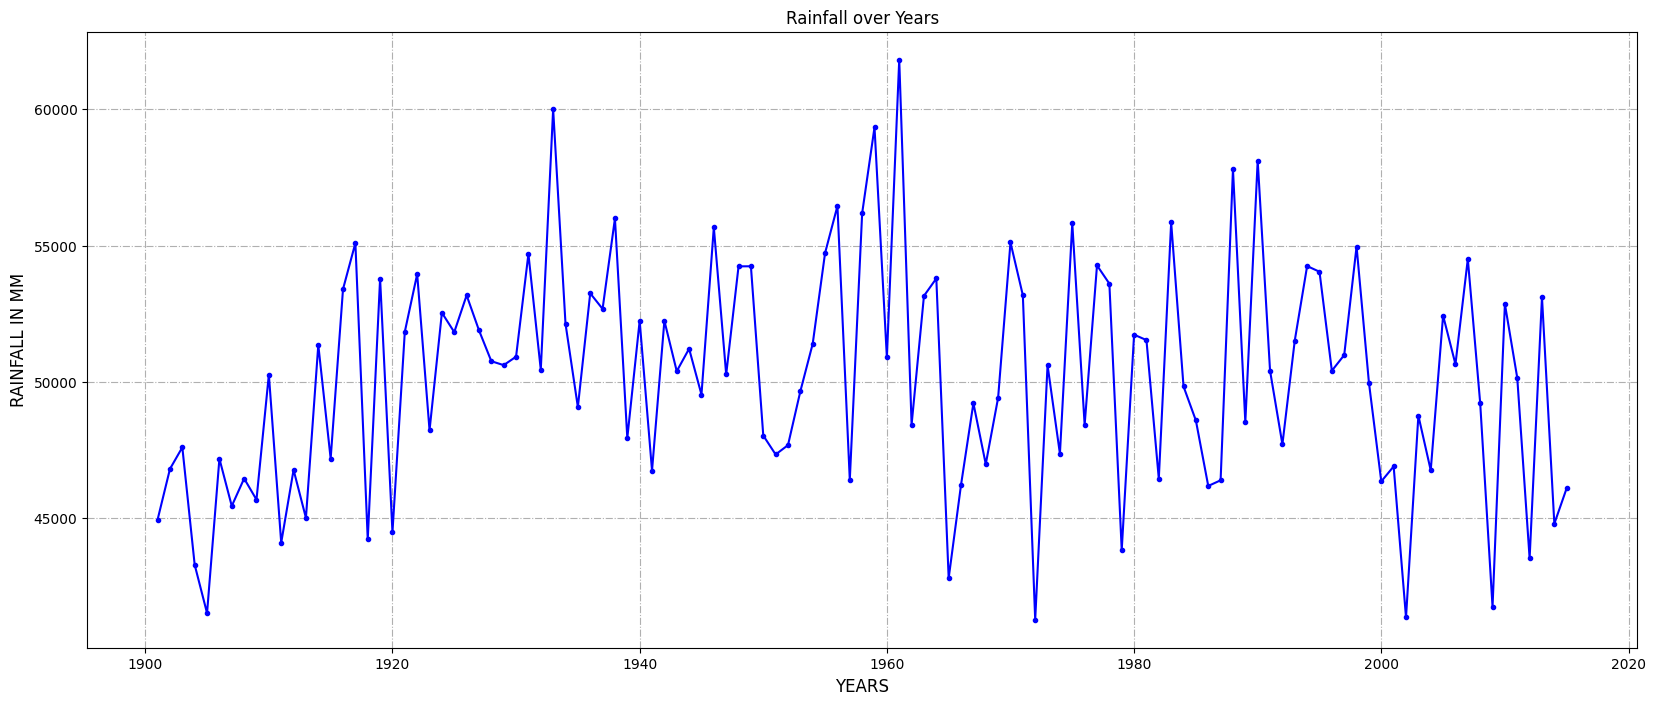

In [15]:
plt.figure(figsize=(20,8))
data.groupby("YEAR").sum()['ANNUAL'].plot(kind="line",color="b",marker=".")
plt.xlabel("YEARS",size=12)
plt.ylabel("RAINFALL IN MM",size=12)
plt.grid(axis="both",linestyle="-.")
plt.title("Rainfall over Years")
plt.show()


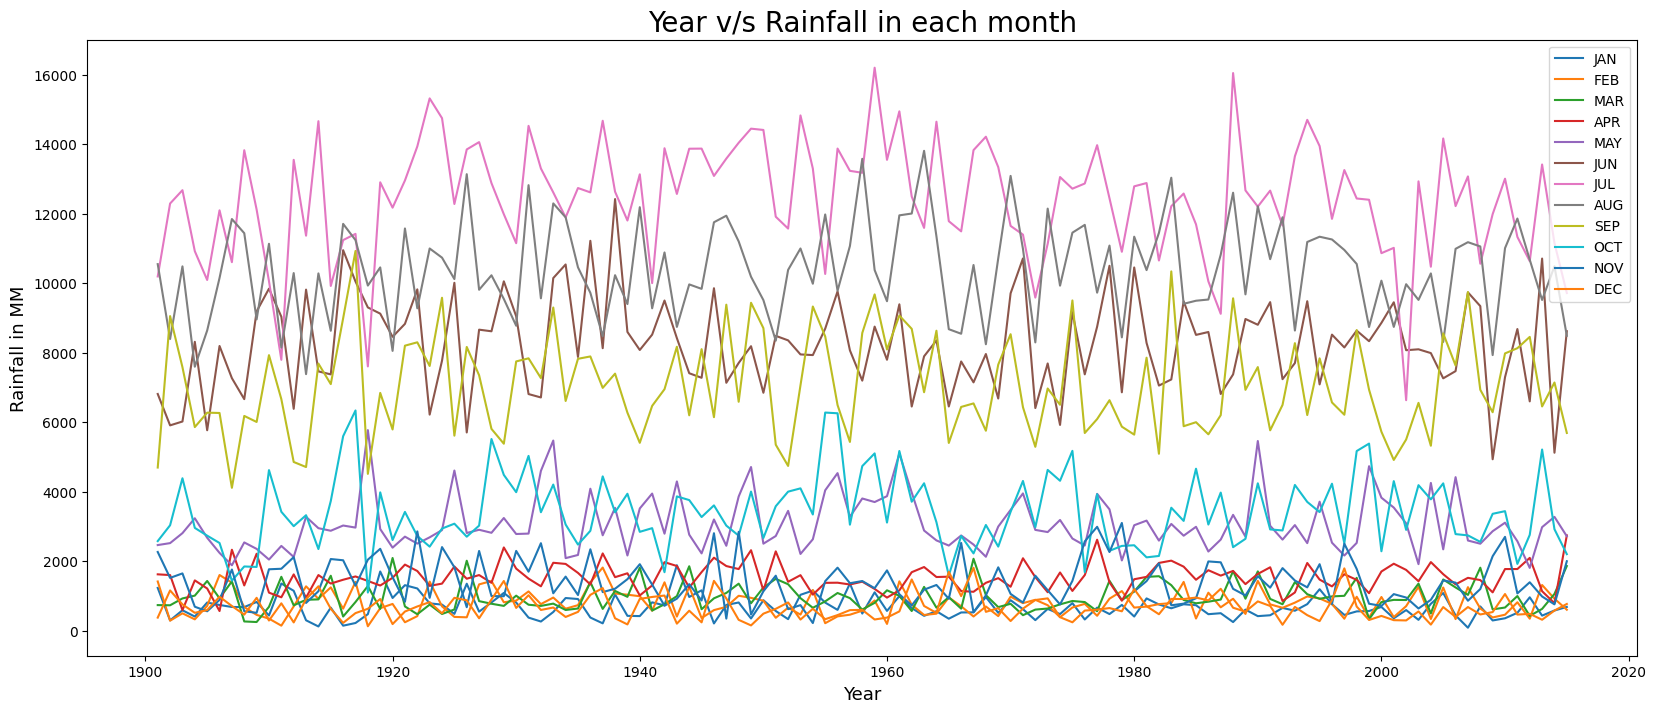

In [16]:
data[['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL','AUG', 'SEP',
      'OCT', 'NOV', 'DEC']].groupby("YEAR").sum().plot(kind="line",figsize=(20,8))
plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.title("Year v/s Rainfall in each month",size=20)
plt.show()


`Above plot shows the Year vs Rainfall in each month,
 we observe that:-
 1)July has heavy rainfall 
 2)Feb has least rainfall `

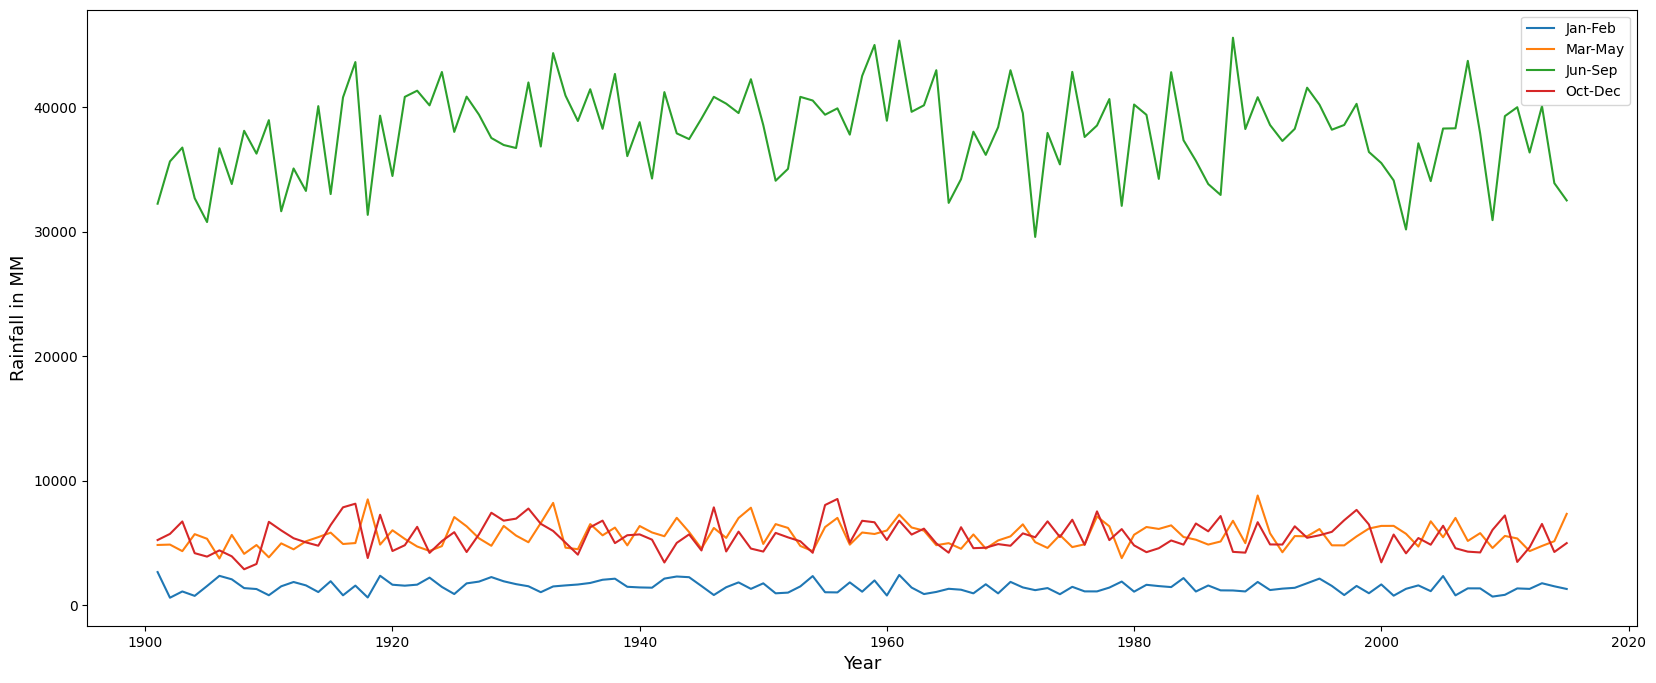

In [17]:
data[['YEAR','Jan-Feb', 'Mar-May',
       'Jun-Sep', 'Oct-Dec']].groupby("YEAR").sum().plot(figsize=(20,8))
plt.xlabel("Year",size=13)
plt.ylabel("Rainfall in MM",size=13)
plt.show()


`From Above Graph we observe that :-
 1)combined jun,july,august,sept recieves huge rainfall
 2)combined jan,feb recieves least Rainfall`

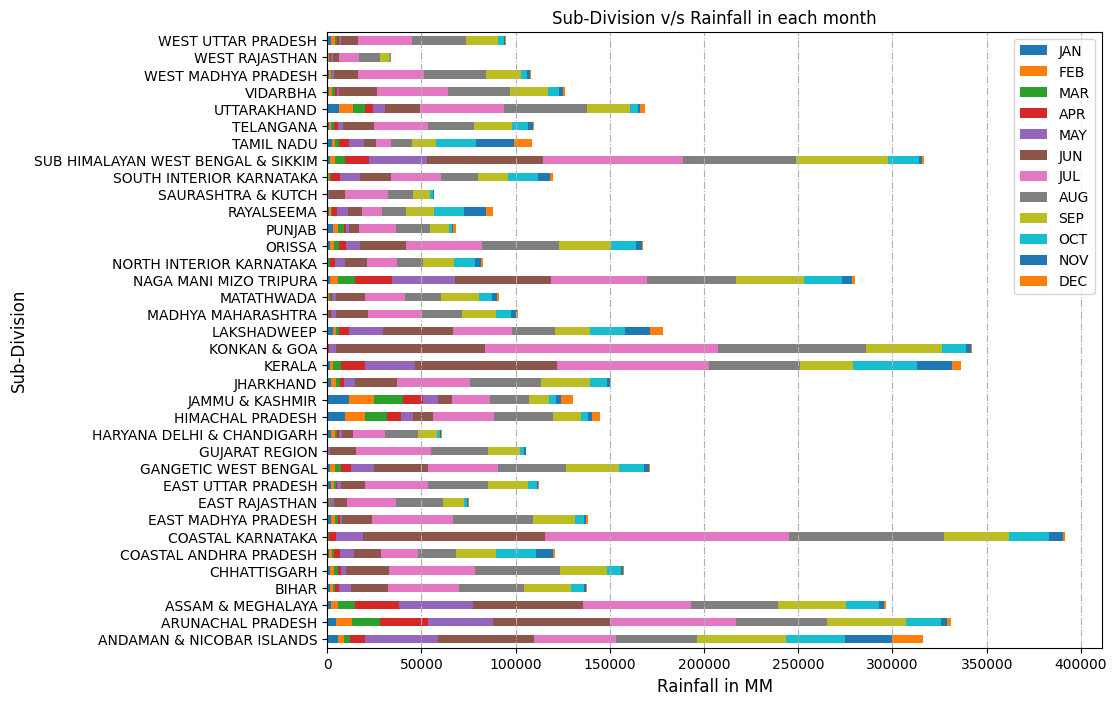

In [18]:
data[['SUBDIVISION', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL',
       'AUG', 'SEP', 'OCT', 'NOV', 'DEC']].groupby("SUBDIVISION").sum().plot(kind="barh",stacked=True,figsize=(10,8))
plt.title("Sub-Division v/s Rainfall in each month")
plt.xlabel("Rainfall in MM",size=12)
plt.ylabel("Sub-Division",size=12)
plt.grid(axis="x",linestyle="-.")
plt.show()


## Modelling 

In [19]:
data["SUBDIVISION"].nunique()


36

In [20]:
group = data.groupby('SUBDIVISION')[['YEAR','JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']]
data = group.get_group('EAST RAJASTHAN')
data.head()


,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC
1932,1901,21.6,8.9,2.900000,0.7,5.0,15.0,164.8,175.6,7.5,9.800000,0.000001,0.800000
1933,1902,4.1,0.7,0.000001,1.8,9.9,34.6,247.6,116.7,145.6,14.400000,0.000001,2.800000
1934,1903,1.9,0.7,1.300000,0.1,12.9,15.6,238.2,229.1,168.5,17.800000,0.000001,0.000001
1935,1904,4.3,5.5,21.700000,0.2,27.5,49.9,289.7,223.5,50.2,1.500000,5.800000,14.700000
1936,1905,4.1,8.8,3.200000,1.6,2.0,14.4,130.5,30.9,83.8,0.000001,0.000001,0.600000


In [21]:
df=data.melt(['YEAR']).reset_index()
df.head()


,index,YEAR,variable,value
0,0,1901,JAN,21.6
1,1,1902,JAN,4.1
2,2,1903,JAN,1.9
3,3,1904,JAN,4.3
4,4,1905,JAN,4.1


In [22]:
df= df[['YEAR','variable','value']].reset_index().sort_values(by=['YEAR','index'])
df.head()


,index,YEAR,variable,value
0,0,1901,JAN,21.6
115,115,1901,FEB,8.9
230,230,1901,MAR,2.9
345,345,1901,APR,0.7
460,460,1901,MAY,5.0


In [23]:
df.YEAR.unique()


array([1901, 1902, 1903, 1904, 1905, 1906, 1907, 1908, 1909, 1910, 1911,
       1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922,
       1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933,
       1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944,
       1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955,
       1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966,
       1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977,
       1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988,
       1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999,
       2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010,
       2011, 2012, 2013, 2014, 2015], dtype=int64)

In [24]:
df.columns=['Index','Year','Month','Avg_Rainfall']


In [25]:
df.head()


,Index,Year,Month,Avg_Rainfall
0,0,1901,JAN,21.6
115,115,1901,FEB,8.9
230,230,1901,MAR,2.9
345,345,1901,APR,0.7
460,460,1901,MAY,5.0


In [26]:
Month_map={'JAN':1,'FEB':2,'MAR' :3,'APR':4,'MAY':5,'JUN':6,'JUL':7,'AUG':8,'SEP':9,
   'OCT':10,'NOV':11,'DEC':12}
df['Month']=df['Month'].map(Month_map)
df.head(12)


,Index,Year,Month,Avg_Rainfall
0,0,1901,1,21.600000
115,115,1901,2,8.900000
230,230,1901,3,2.900000
345,345,1901,4,0.700000
460,460,1901,5,5.000000
575,575,1901,6,15.000000
690,690,1901,7,164.800000
805,805,1901,8,175.600000
920,920,1901,9,7.500000
1035,1035,1901,10,9.800000


In [27]:
df.drop(columns="Index",inplace=True)


In [28]:
df.head(2)


,Year,Month,Avg_Rainfall
0,1901,1,21.6
115,1901,2,8.9


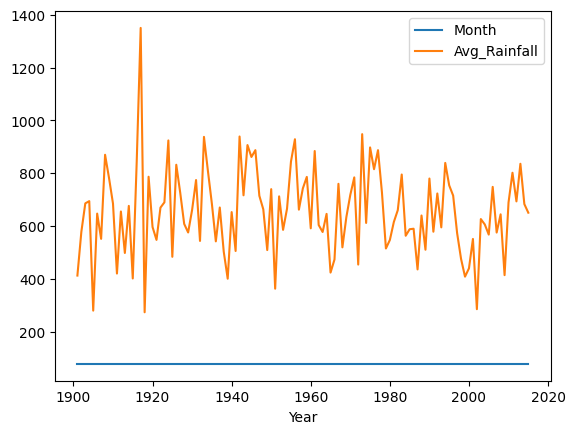

In [29]:
df.groupby("Year").sum().plot()
plt.show()


In [30]:
X=np.asanyarray(df[['Year','Month']]).astype('int')
y=np.asanyarray(df['Avg_Rainfall']).astype('int')
print(X.shape)
print(y.shape)


(1380, 2)
(1380,)


In [31]:
# splitting the dataset into training and testing
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)


### Linear Regression Model

In [32]:
from sklearn.linear_model import LinearRegression
LR = LinearRegression()
LR.fit(X_train,y_train)


LinearRegression()

In [33]:
# predicting 
y_train_predict=LR.predict(X_train)
y_test_predict=LR.predict(X_test)


In [34]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("\n-----Training Accuracy-------")
print(round(LR.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(LR.score(X_test,y_test),3)*100)



-------Test Data--------
MAE: 66.73104651038071
MSE: 8069.786528931836
RMSE: 89.83199056534279

-------Train Data--------
MAE: 64.85091346352783
MSE: 8042.865198188733
RMSE: 89.68202271463737

-----Training Accuracy-------
3.2
-----Testing Accuracy--------
2.3


In [35]:
predicted = LR.predict([[2014,2]])


In [36]:
predicted


array([32.33307479])

### Svm Model

In [37]:
from sklearn import preprocessing
from sklearn import svm

svm_regr = svm.SVC(kernel='rbf')
svm_regr.fit(X_train, y_train) 


SVC()

In [38]:
y_test_predict = svm_regr.predict(X_test)
y_train_predict = svm_regr.predict(X_train)


In [39]:
from sklearn import metrics
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))


print("\n-----Training Accuracy-------")
print(round(svm_regr.score(X_train,y_train),3)*100)
print("-----Testing Accuracy--------")
print(round(svm_regr.score(X_test,y_test),3)*100)


-------Test Data--------
MAE: 55.55314009661836
MSE: 11347.920289855072
RMSE: 106.52661775281834

-------Train Data--------
MAE: 53.62732919254658
MSE: 11184.142857142857
RMSE: 105.75510794823509

-----Training Accuracy-------
25.6
-----Testing Accuracy--------
29.2


### xgboost

In [42]:
!pip install xgboost

  Using cached xgboost-2.0.3-py3-none-win_amd64.whl (99.8 MB)



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from xgboost import XGBRegressor
xgb = XGBRegressor()
xgb.fit(X_train, y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [44]:
y_train_predict=xgb.predict(X_train)
y_test_predict=xgb.predict(X_test)


In [45]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("-----------Training Accuracy------------")
print(round(xgb.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(xgb.score(X_test,y_test),3)*100)

-------Test Data--------
MAE: 31.686229053585553
MSE: 3230.8511409324933
RMSE: 56.840576535891095

-------Train Data--------
MAE: 7.293366329671186
MSE: 154.9591251227297
RMSE: 12.448257915175509
-----------Training Accuracy------------
98.1
-----------Testing Accuracy------------
60.9


In [65]:
predicted1 = xgb.predict([[2014,2]])


In [66]:
predicted1


array([9.962929], dtype=float32)

### Random Forest Model

In [48]:
 ### Random Forest Model

# %%
from sklearn.ensemble import RandomForestRegressor
random_forest_model = RandomForestRegressor(max_depth=100, max_features='sqrt', min_samples_leaf=4,
                      min_samples_split=10, n_estimators=800)
random_forest_model.fit(X_train, y_train)

# %%
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)


In [49]:
print(data.isnull().sum())


YEAR    0
JAN     0
FEB     0
MAR     0
APR     0
MAY     0
JUN     0
JUL     0
AUG     0
SEP     0
OCT     0
NOV     0
DEC     0
dtype: int64


In [50]:
y_train_predict=random_forest_model.predict(X_train)
y_test_predict=random_forest_model.predict(X_test)


In [51]:
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))

print("-----------Training Accuracy------------")
print(round(random_forest_model.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(random_forest_model.score(X_test,y_test),3)*100)


-------Test Data--------
MAE: 29.580743748359208
MSE: 2361.6097504313134
RMSE: 48.59639647578114

-------Train Data--------
MAE: 21.635141417611667
MSE: 1537.8674629759473
RMSE: 39.215653290184356
-----------Training Accuracy------------
81.5
-----------Testing Accuracy------------
71.39999999999999


In [52]:
score1 = r2_score(y_test, y_test_predict)
score1


0.7141520448400449

In [53]:
predicted2 = random_forest_model.predict([[2014,2]])


In [54]:
predicted2


array([12.84495467])

# Ensemble Stacking

### Hybrid Model 4

In [56]:
!pip install mlxtend

     ---------------------------------------- 1.4/1.4 MB 387.0 kB/s eta 0:00:00



[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [57]:
from mlxtend.regressor import StackingCVRegressor


In [58]:
stack4 = StackingCVRegressor(regressors=( random_forest_model,xgb,LR),
                            meta_regressor=random_forest_model, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack4.fit(X_train, y_train)

y_train_predict=stack4.predict(X_train)
y_test_predict=stack4.predict(X_test)
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
print("-----------Training Accuracy------------")
print(round(stack4.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack4.score(X_test,y_test),3)*100)


-------Test Data--------
MAE: 26.673101410419065
MSE: 2163.638075224873
RMSE: 46.51492314542585

-------Train Data--------
MAE: 23.563888044643598
MSE: 1933.5768407542744
RMSE: 43.97245547788154
-----------Training Accuracy------------
76.7
-----------Testing Accuracy------------
73.8


In [59]:
score5 = r2_score(y_test, y_test_predict)
score5


0.7381144283485888

### Hybrid Model 5

In [60]:
stack5 = StackingCVRegressor(regressors=( LR,xgb,svm_regr),
                            meta_regressor=random_forest_model, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)

stack5.fit(X_train, y_train)

y_train_predict=stack5.predict(X_train)
y_test_predict=stack5.predict(X_test)
print("-------Test Data--------")
print('MAE:', metrics.mean_absolute_error(y_test, y_test_predict))
print('MSE:', metrics.mean_squared_error(y_test, y_test_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_test_predict)))

print("\n-------Train Data--------")
print('MAE:', metrics.mean_absolute_error(y_train,y_train_predict))
print('MSE:', metrics.mean_squared_error(y_train, y_train_predict))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_train_predict)))
print("-----------Training Accuracy------------")
print(round(stack5.score(X_train,y_train),3)*100)
print("-----------Testing Accuracy------------")
print(round(stack5.score(X_test,y_test),3)*100)


-------Test Data--------
MAE: 26.93665739329445
MSE: 2244.872310124171
RMSE: 47.380083475276514

-------Train Data--------
MAE: 22.36118637948341
MSE: 1731.8534821936553
RMSE: 41.61554375703452
-----------Training Accuracy------------
79.2
-----------Testing Accuracy------------
72.8


In [61]:
score6 = r2_score(y_test, y_test_predict)
score6


0.7282818808962814

### Compare

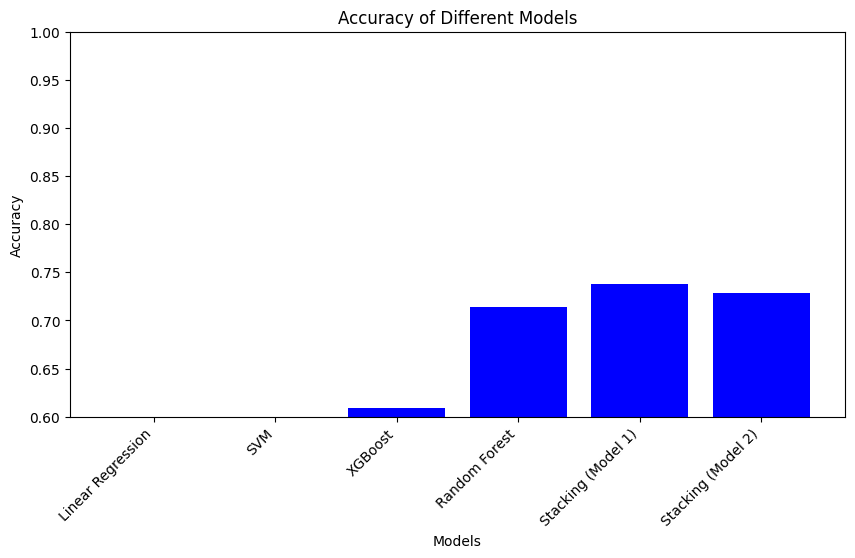

In [69]:
import numpy as np
import matplotlib.pyplot as plt

# Define the models and their corresponding accuracies
models = ['Linear Regression', 'SVM', 'XGBoost', 'Random Forest', 'Stacking (Model 1)', 'Stacking (Model 2)']
accuracies = [LR.score(X_test, y_test), svm_regr.score(X_test, y_test), xgb.score(X_test, y_test),
              random_forest_model.score(X_test, y_test), stack4.score(X_test, y_test), stack5.score(X_test, y_test)]

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(models, accuracies, color='blue')
plt.title('Accuracy of Different Models')
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.ylim(0.6, 1)  # Set y-axis limit to ensure readability
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.show()


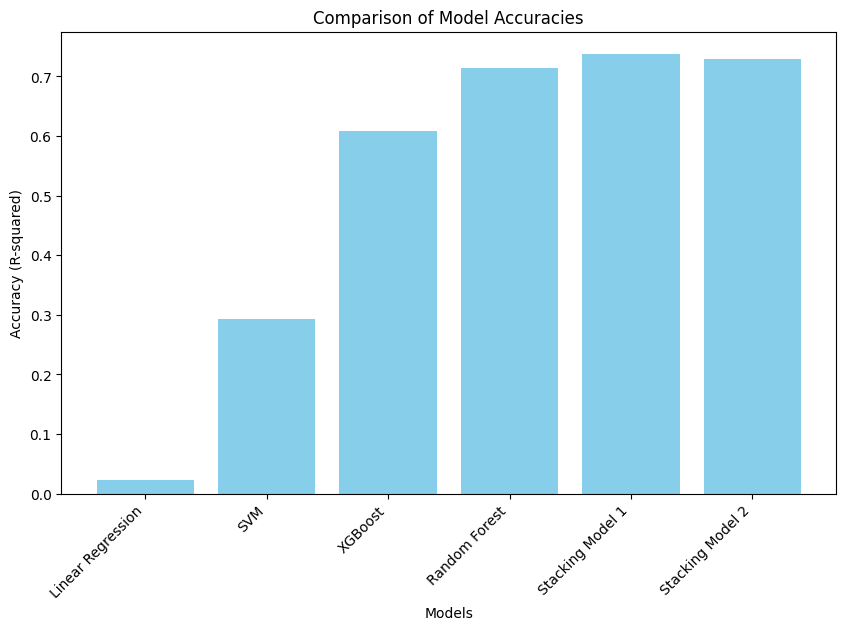

In [68]:
import matplotlib.pyplot as plt

# Accuracy scores for each model
models = ['Linear Regression', 'SVM', 'XGBoost', 'Random Forest', 'Stacking Model 1', 'Stacking Model 2']
accuracies = [LR.score(X_test, y_test), svm_regr.score(X_test, y_test), xgb.score(X_test, y_test),
              random_forest_model.score(X_test, y_test), stack4.score(X_test, y_test), stack5.score(X_test, y_test)]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Accuracy (R-squared)')
plt.title('Comparison of Model Accuracies')
plt.xticks(rotation=45, ha='right')
plt.show()


In [70]:
from joblib import dump

# Dictionary to store model objects and their accuracy scores
models = {
    'Linear Regression': LR,
    'SVM': svm_regr,
    'XGBoost': xgb,
    'Random Forest': random_forest_model,
    'Stacking (Model 1)': stack4,
    'Stacking (Model 2)': stack5
}

# Dictionary to store accuracy scores
accuracy_scores = {}

# Calculate accuracy scores for each model
for model_name, model in models.items():
    accuracy_scores[model_name] = model.score(X_test, y_test)

# Identify the model with the highest accuracy score
best_model_name = max(accuracy_scores, key=accuracy_scores.get)
best_model = models[best_model_name]

# Save the best model
dump(best_model, 'best_model.joblib')

print(f"The best model with the highest accuracy ({accuracy_scores[best_model_name]}) has been saved.")


The best model with the highest accuracy (0.7381144283485888) has been saved.
